In [ ]:
# look for equities with certain good charachteristics
# This is like a crawler, going through equities until it finds ones with desirable 
# properties

# Propoerties to look for
# Smoothness - This way it can be very predictable. At any given point in time, we are confident there
# arent going to be large changes in direction 

# Lets define the properties on one equity and then minimise over a random search

In [2]:
# import numpy as np
import pandas as pd
import numpy as np

import yfinance as yf

from autoIG import tickers

# plotting
import plotnine as pn
from plotnine import ggplot, aes, geom_col, theme, geom_point,scale_x_continuous ,scale_y_continuous

In [8]:

history_config =  {"start":"2020-06-01","interval":"1d"}

gold = yf.Ticker(tickers.GOLD_TICKER)
msft = yf.Ticker(tickers.MSFT_TICKER)


In [99]:
history_raw = gold.history(**history_config)
history = history_raw.reset_index()
history = history.reset_index()

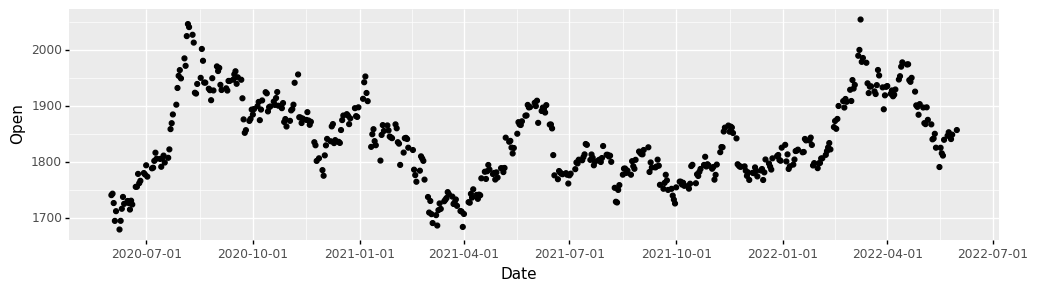

<ggplot: (304332466)>

In [100]:
(
    ggplot(history)+
    geom_point(aes('Date','Open'))+
    theme(figure_size=[12,3])
)


In [101]:
## Curve smoothness
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [102]:
mod.fit(X = np.array([[1],[2],[3]]),y = np.array([[1740.4],[1743],[1726.3]]))
mod.predict(np.array([[4]]))

array([[1722.46666667]])

In [103]:
mod = LinearRegression()

def predict_based_on_last_n(history,n = 3):
    predictions = [np.NaN] * n
    for i in range(n,len(history)):
        df = history[['index','Open']]
        X = df['index'].to_numpy().reshape(-1, 1)
        y = df['Open']
        mod.fit(X = X[i-n:i,:] ,y = y.iloc[i-n:i])
        next_prediction = mod.predict(X[i:i+1,:])[0]
        predictions.append(next_prediction)
    return predictions

In [127]:
number_of_trails = 10

In [126]:
funcs = {"preds_"+str(i):predict_based_on_last_n(history,i) for i in range(2,number_of_trails)}
history = history.assign(**funcs)


In [128]:
# funcs2 = {"diff_"+str(i): lambda df: df.loc[:,'preds_'+str(i)] for i in range(2,5)}
for i in range(2,number_of_trails):
    history["diff_"+str(i)] = np.abs(history.loc[:,'preds_'+str(i)] - history['Open'])

# history.assign(**funcs2)#['diff_4'].agg(np.mean)

In [135]:
history.iloc[:,history.columns.str.contains('diff_')].agg(np.mean)

diff_2    19.913095
diff_3    17.449101
diff_4    17.076891
diff_5    17.565288
diff_6    18.096890
diff_7    18.868364
diff_8    19.527029
diff_9    20.005397
dtype: float64

In [ ]:
# now save intermediate results in a datatable and start looking for equity with low means